In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import random
import scipy
import seaborn

## Generación de una población con distribución Poisson

Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [54]:
population_mu = 10
population = scipy.stats.poisson.rvs(mu=population_mu, size=10000)
print(population.shape)
population[:40]

(10000,)


array([ 8, 10,  7, 10, 12,  9,  9, 11, 15, 11,  8, 11,  8, 12,  9,  8,  8,
        8, 13, 14,  8,  9,  4,  8, 12,  8,  9, 11, 12, 12, 11,  8, 15, 11,
       11, 11,  6,  5,  7,  9])

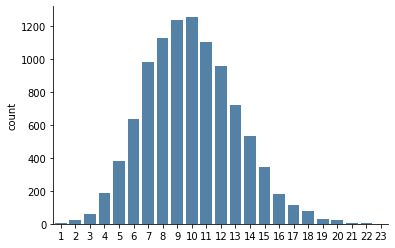

In [55]:
seaborn.countplot(population, color='steelblue')
seaborn.despine()

### Sampleo aleatorio con y sin reposición

https://pynative.com/python-random-sample/

In [77]:
sample_size = 500

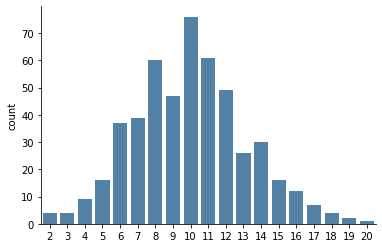

In [78]:
new_sample = random.sample(population.tolist(), sample_size)  # Sin reemplazo
seaborn.countplot(new_sample, color='steelblue')
seaborn.despine()

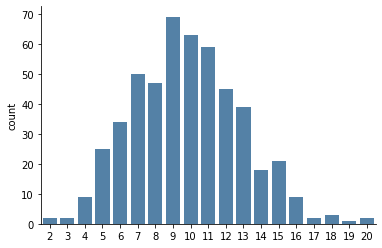

In [79]:
new_sample = random.choices(population.tolist(), k=sample_size)  # Con reemplazo
seaborn.countplot(new_sample, color='steelblue')
seaborn.despine()

### La verdad del Teorema Central del Límite

Por el teorema central del límite, esperamos que el conjunto de medias tenga una distribución aproximadamente normal con la misma media poblacional y $\sigma = s/\sqrt{n}$, donde n es la cantidad de muestras.

1000 500


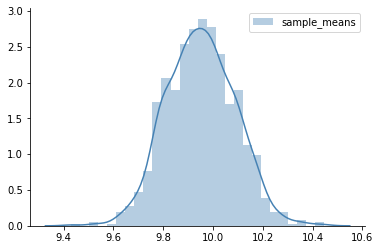

In [80]:
n_samples = 1000
print(n_samples, sample_size)
sample_means = []
for _ in range(n_samples):
    new_sample = random.sample(population.tolist(), k=sample_size)  # Sin reemplazo
    sample_means.append(numpy.mean(new_sample))  # media muestral
    
# Calculate expected normal distribution
seaborn.distplot(sample_means, label="sample_means", color="steelblue")
plt.legend()
seaborn.despine()

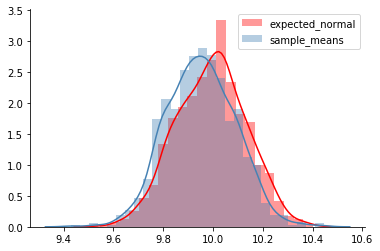

In [81]:
# Calculate expected normal distribution
mean_distribution_sigma = numpy.sqrt(population_mu) / numpy.sqrt(sample_size)
expected_normal = numpy.random.normal(population_mu, mean_distribution_sigma, 1000)
seaborn.distplot(expected_normal, label="expected_normal", color="red")
seaborn.distplot(sample_means, label="sample_means", color="steelblue")
plt.legend()
seaborn.despine()

### Intervalos de confianza (del promedio como estimador de la distribución de medias poblacionales)

In [2]:
scipy.stats.norm.interval?

Signature: scipy.stats.norm.interval(alpha, *args, **kwds)
Docstring:
Confidence interval with equal areas around the median.

Parameters
----------
alpha : array_like of float
    Probability that an rv will be drawn from the returned range.
    Each value should be in the range [0, 1].
arg1, arg2, ... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    location parameter, Default is 0.
scale : array_like, optional
    scale parameter, Default is 1.

Returns
-------
a, b : ndarray of float
    end-points of range that contain ``100 * alpha %`` of the rv's
    possible values.
File:      ~/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [4]:
scipy.stats.norm.interval(0.95, loc=10, scale=5)

(0.20018007729973064, 19.79981992270027)